In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Simulation d'un réseau de neurones avec BRIAN (réseau CUBA)

Nous implémentons également un réseau de neurones CUBA.

https://brian.readthedocs.org/en/latest/tutorial2_connections.html#tutorial-2-connections

In [7]:
taum = 20 * ms
taue = 5 * ms
taui = 10 * ms
Vt = -50 * mV
Vr = -60 * mV
El = -49 * mV
we = (60 * 0.27 / 10) * mV
wi = (20 * 4.5 / 10) * mV

In [8]:
eqs = Equations('''
    dV/dt  = (ge-gi-(V-El))/taum : volt
    dge/dt = -ge/taue            : volt
    dgi/dt = -gi/taui            : volt
    ''')

In [9]:
G = NeuronGroup(N=4000, model=eqs, threshold=Vt, reset=Vr)

Ge = G.subgroup(3200)
Gi = G.subgroup(800)

Ce = Connection(Ge, G, 'ge', sparseness = 0.02, weight=we)
Ci = Connection(Gi, G, 'gi', sparseness = 0.02, weight=wi)

In [10]:
M = SpikeMonitor(G)
Mv = StateMonitor(G, 'V', record=0)
Mge = StateMonitor(G, 'ge', record=0)
Mgi = StateMonitor(G, 'gi', record=0)

In [11]:
G.V = Vr + (Vt - Vr) * rand(len(G))

In [12]:
run(1000 * ms)

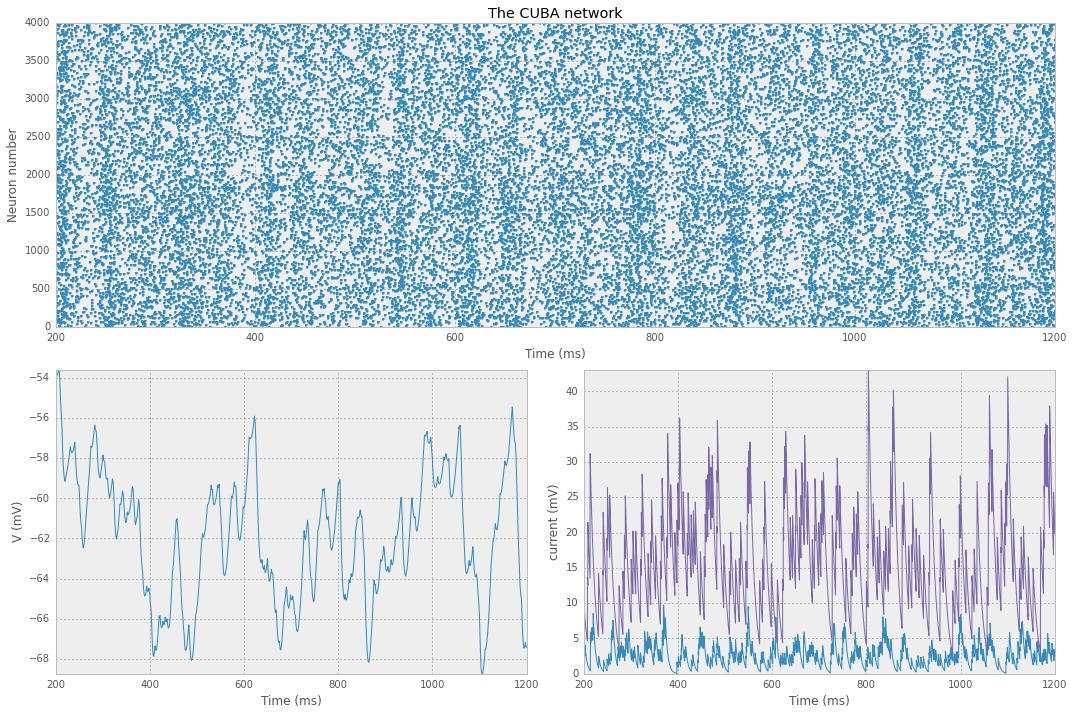

In [13]:
figure(figsize=(15, 10))
subplot(211)
raster_plot(M, title='The CUBA network', newfigure=False)
axis('tight')
subplot(223)
plot(Mv.times/ms, Mv[0]/mV)
xlabel('Time (ms)')
ylabel('V (mV)')
axis('tight')
subplot(224)
plot(Mge.times / ms, Mge[0] / mV, label='ge')
plot(Mgi.times / ms, Mgi[0] / mV, label='gi')
xlabel('Time (ms)')
ylabel('current (mV)')
axis('tight')
# legend('upper right')
tight_layout()
show()

# sandbox

In [14]:
%%timeit
run(1000 * ms)

1 loops, best of 3: 1.8 s per loop
